In [49]:
#importing neccesary libraries and reading dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
df=pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [51]:
#duplicated values
df.duplicated().sum()

0

In [52]:
#null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
# droping unwanted column name
df=df.drop(columns='Cabin',axis=1)

In [54]:
# replacing missing values with mean 
df['Age'].fillna(df['Age'].mean(),inplace=True)


In [56]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [57]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [58]:
#identifying garbage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print('***'*10)

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
******************************
Sex
male      577
female    314
Name: count, dtype: int64
******************************
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
******************************
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
******************************


In [59]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:

df.describe(include="object")

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,646


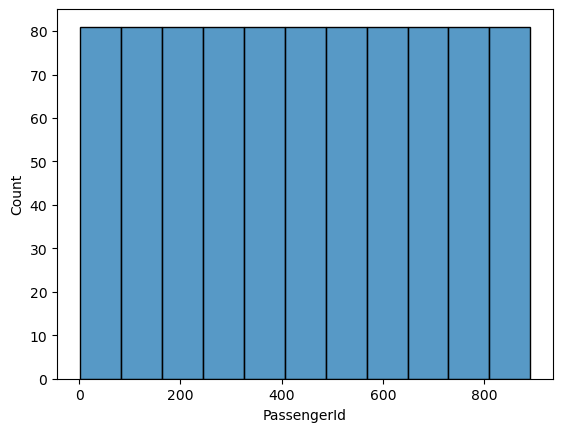

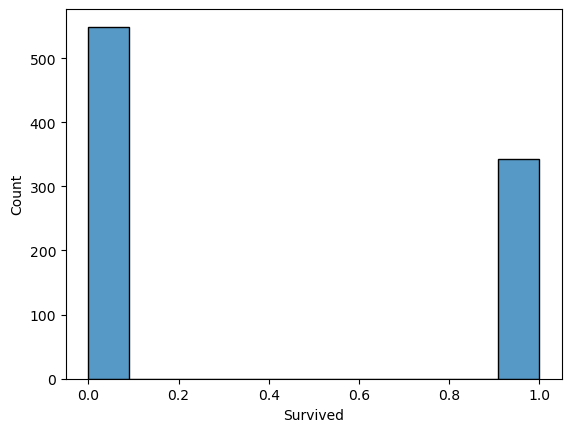

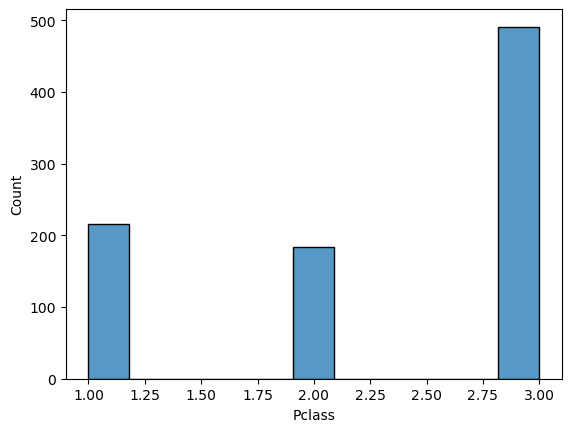

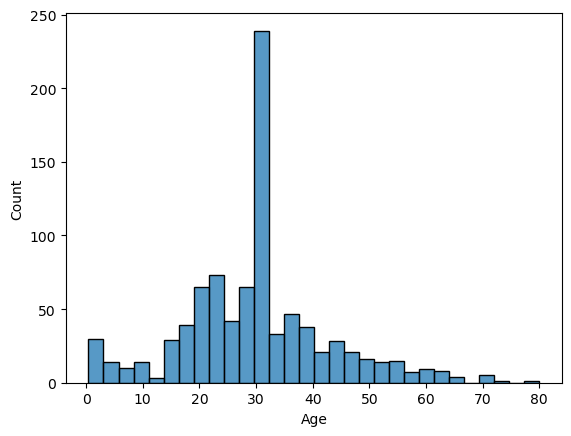

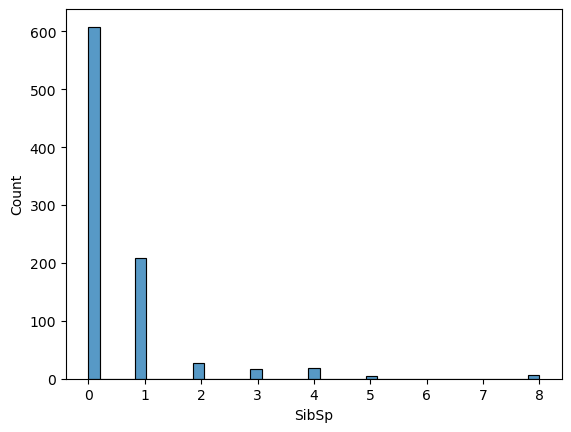

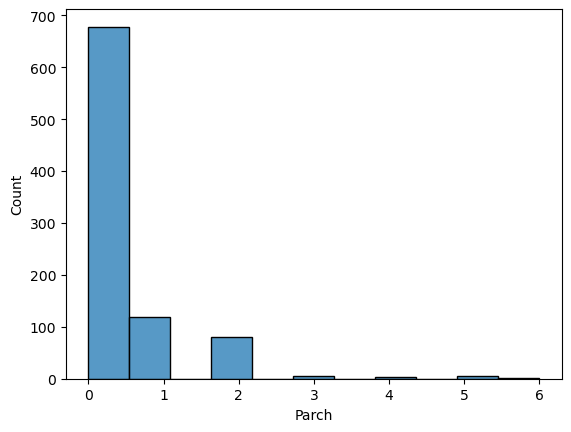

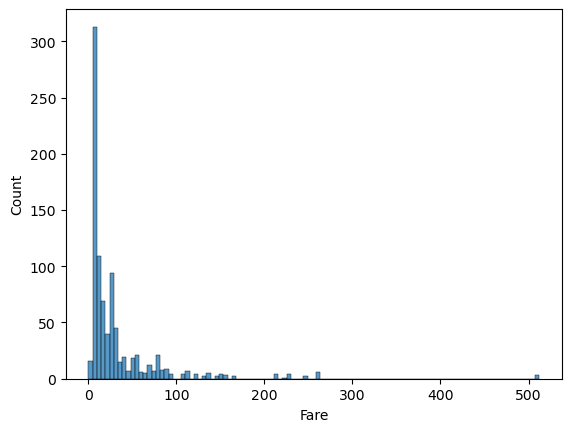

In [61]:
# histogram to understand the distribution of dataset
import warnings 
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

In [62]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [207]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

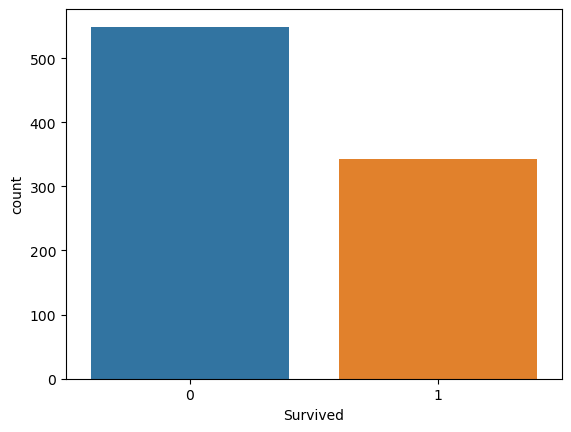

In [63]:
sns.countplot(x=df['Survived'])

In [64]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

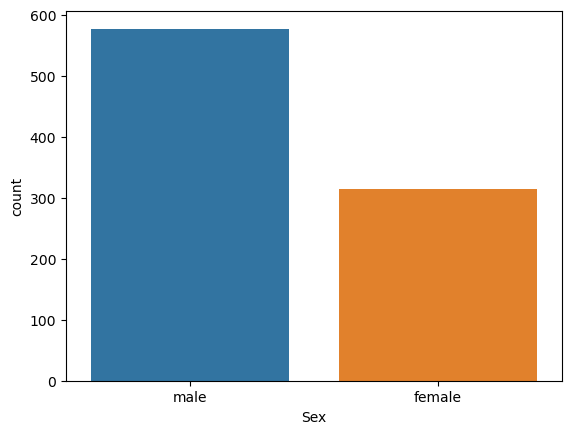

In [65]:
sns.countplot(x=df['Sex'])

In [66]:
df["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

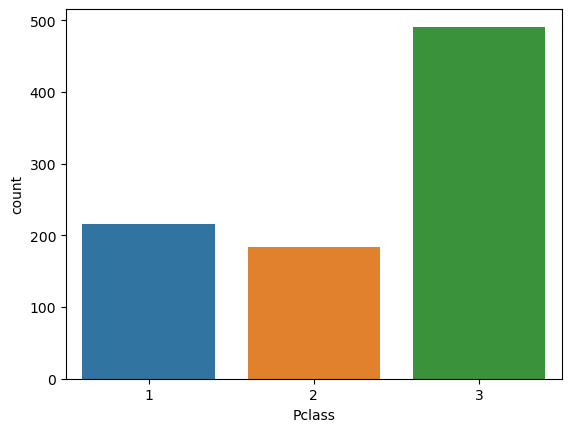

In [67]:
sns.countplot(x=df['Pclass'])

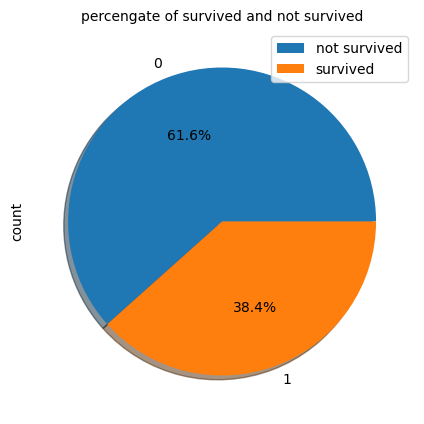

In [68]:
df['Survived'].value_counts().plot(kind='pie',explode=[0,0],figsize=(5,5),autopct='%1.1f%%',shadow=True)
plt.title('percengate of survived and not survived',fontsize=10)
plt.legend(['not survived','survived'])
plt.show()

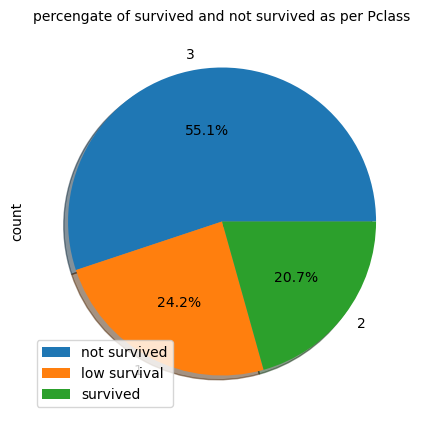

In [69]:
df['Pclass'].value_counts().plot(kind='pie',explode=[0,0,0],figsize=(6,5),autopct='%1.1f%%',shadow=True)
plt.title('percengate of survived and not survived as per Pclass',fontsize=10)
plt.legend(['not survived','low survival','survived'])
plt.show()

In [70]:
#correlation with heatmap to interpret the relation and multicolliniarity
s=df.select_dtypes(include="number").corr()

<Axes: >

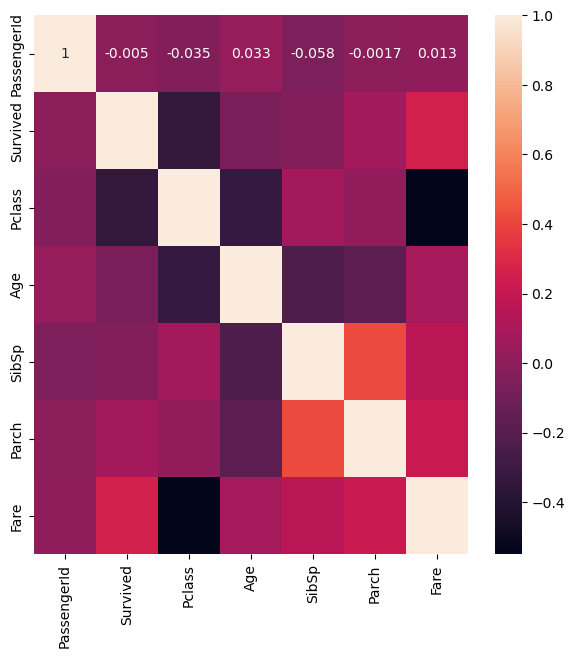

In [71]:
plt.figure(figsize=(7,7))
sns.heatmap(s,annot=True)

In [72]:

from sklearn.preprocessing import LabelEncoder

In [218]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [73]:

le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df.head()
    


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [74]:
X=df [['Pclass','Sex']]
Y=df['Survived']

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [76]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
models = {
'log' : LogisticRegression(random_state = 0)
}
# Loop through the models, train, test, and print results
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, prediction)
    print(f"{model_name} Accuracy: {accuracy}")
    print("\n" + "="*40 + "\n")


log Accuracy: 0.7877094972067039




In [77]:
y_pred = model.predict(X_test)

In [78]:
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.7877094972067039

In [79]:
class_report = classification_report(Y_test, y_pred)
class_report

'              precision    recall  f1-score   support\n\n           0       0.82      0.84      0.83       110\n           1       0.73      0.71      0.72        69\n\n    accuracy                           0.79       179\n   macro avg       0.78      0.77      0.77       179\nweighted avg       0.79      0.79      0.79       179\n'

In [80]:
print(Y_test)

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64


In [99]:
def Survived(Pclass, Sex):
    Survived = model.predict([[Pclass, Sex]])
    return Survived[0]
    

In [100]:
name = "Sex"
predict_survival = Survived(150.0, 30.0)
print(f"\nPredict survival for {name}: {predict_survival:.2f}")


Predict survival for Sex: 0.00
